In [1]:
using Plots
using ITensors
include("OptimKit_correction.jl")
include("MPS_MPO_scripts.jl")
include("GetingData.jl")
include("Optimization.jl")
Threads.nthreads()

64

In [2]:
parameters = getParameters()
parameters["freeze_mpo"] = false
parameters["spacing"] = 0
parameters["mps_bond_dim"] = 7
parameters["MPO_bond_dim"] = 1
parameters["training_set_size"] = 1024
parameters["label_noise"] = 0.1;

In [3]:
# setPhysAndConnectInds();
# mps, mpo = loadMPSandMPO();
# test_loss, test_acc = Loss_and_Accuracy(mps, mpo, "test");

In [4]:
path = pathName()
name = "updates_losses_and_acc"
x = jldopen(path * "/" * name * ".jld", "r") do file
    f = read(file, name)
end;

In [5]:
average_train_acc = []
av_train_losses = []
valid_acc = []
epochs = []

for i in 1:2000
    train_accuracy = x["epoch_$(i)"]["train_acc"]
    train_losses = x["epoch_$(i)"]["train_losses"]
    valid_accuracy = x["epoch_$(i)"]["valid_acc"]
    if length(valid_accuracy) > 0
        append!(average_train_acc, sum(train_accuracy) / length(train_accuracy))
        append!(av_train_losses, sum(train_losses) / length(train_losses))
        append!(valid_acc, valid_accuracy[1])
        append!(epochs, i)
    end
    
end

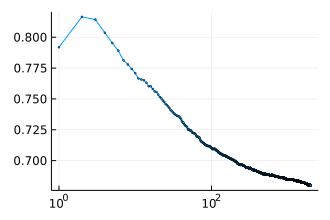

In [6]:
plot()

# plot!(epochs, average_train_acc, xtickfontsize = 11, ytickfontsize = 11, 
#     #tickfont = 12, # xtickfont = font(12, "Arial"), #ytickfont = font(12, "Arial"), 
# #         marker = :o, 
#         legend = :bottomright, markersize = 3, 
#         label = "", #yticks = [i/100 for i in 81:1:99], #grid = :off,
#         left_margin = 1Plots.mm, right_margin = 15Plots.mm, 
#         bottom_margin = 5Plots.mm) #"")

plot!(epochs, valid_acc, #xtickfont = font(12, "Arial"), ytickfont = font(12, "Arial"), 
        marker = :o, 
        legend = :bottomright, markersize = 1,
        label = "") # "valid acc"

# plot!(twinx(),av_train_losses, linestyle = :dash, 
#         xtickfontsize = 11, ytickfontsize = 11,  
#         color = "black", label = "av loss")

# annotate!(33, 0.94, text("test=$(test_acc)", :black, :right, :bottom, 12))

# xlims!(50, 11)
# ylims!(0.7, 1.02)
plot!(size=(330, 220), xaxis =:log, #xlabel = "epoch", xaxis =:log,
        ylabel ="",  #xticks = [i for i in 1:6:51],
        )

In [7]:
# savefig("xx.pdf")

In [8]:
noise_arr = [0.0, 0.1, 0.2]
bond_dim_arr = [i for i in 2:20]
best_valid_acc = Array{Float64}(undef, length(noise_arr), length(bond_dim_arr))
last_valid_acc = Array{Float64}(undef, length(noise_arr), length(bond_dim_arr))
last_train_acc = Array{Float64}(undef, length(noise_arr), length(bond_dim_arr))

for (i, noise) in enumerate(noise_arr)
    parameters["label_noise"] = noise
    
    for (j, chi) in enumerate(bond_dim_arr)

        parameters["mps_bond_dim"] = chi
        path = pathName()
        name = threePointName()
        full_path = path * "/" * name * ".jld"
        if isfile(full_path)
            x = jldopen(full_path, "r") do file
                last_valid_acc[i,j], best_valid_acc[i,j], last_train_acc[i,j] = read(file, name)
            end
        end
    end
end;

In [9]:
# plot()

# plot!(bond_dim_arr, last_valid_acc, xtickfontsize = 11, ytickfontsize = 11,  # valid_acc[:, end]
#             marker = :o, 
#             legend = :bottomright, markersize = 2, 
#             label = "valid acc last", 
#             left_margin = 0Plots.mm, right_margin = 0Plots.mm, 
#             bottom_margin = 3Plots.mm) 

# plot!(bond_dim_arr, best_valid_acc, xtickfontsize = 11, ytickfontsize = 11, 
#             legend = :bottomright, 
#             label = "valid acc best", 
#             left_margin = 0Plots.mm, right_margin = 0Plots.mm, 
#             bottom_margin = 3Plots.mm, )#linestyle = :dash) 

# plot!(bond_dim_arr, last_train_acc, xtickfontsize = 11, ytickfontsize = 11, 
#             marker = :o, color = "black",
#             legend = :bottomright, markersize = 2, 
#             label = "train acc last", 
#             left_margin = 0Plots.mm, right_margin = 0Plots.mm, 
#             bottom_margin = 3Plots.mm, )#linestyle = :dash) 



# # vline!([6], color = "black", linestyle = :dash, label = "")

# # plot!([17, 32], [0,0], fillrange = [1,1], fillalpha = 0.1, color = "black", label = "")
# # plot!([19, 32], [0,0], fillrange = [1,1], fillalpha = 0.1, color = "black", label = "")
# # plot!([25, 32], [0,0], fillrange = [1,1], fillalpha = 0.1, color = "black", label = "")

# ylims!(0.4, 1.01)
# plot!(size=(300, 220), xlabel = "bond dim", #xticks = bond_dim_arr, 
#         ylabel ="", )
# #         xticks = [i for i in 2:4:30], yticks = [0.9 + i/100 for i in 0:2:10])

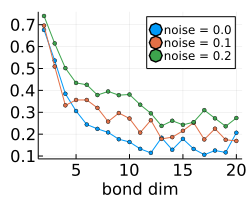

In [10]:
plot()

for (i, noise) in enumerate(noise_arr)
    
    plot!(bond_dim_arr, ones(length(last_valid_acc[i,:])) - last_valid_acc[i,:], xtickfontsize = 11, ytickfontsize = 11, 
                legend = :topright, 
                label = "noise = $(noise)", marker = :o, markersize = 2,
                left_margin = 0Plots.mm, right_margin = 0Plots.mm, 
                bottom_margin = 3Plots.mm, )#linestyle = :dash) 
    
#     plot!(bond_dim_arr, ones(length(best_valid_acc[i,:])) - best_valid_acc[i,:], xtickfontsize = 11, ytickfontsize = 11, 
#             legend = :bottomright, 
#             label = "", #marker = :o, markersize = 2,
#             left_margin = 0Plots.mm, right_margin = 0Plots.mm, 
#             bottom_margin = 3Plots.mm)#, linestyle = :dash) 
end

# vline!([6], color = "black", linestyle = :dash, label = "")

# plot!([17, 32], [0,0], fillrange = [1,1], fillalpha = 0.1, color = "black", label = "")
# plot!([19, 32], [0,0], fillrange = [1,1], fillalpha = 0.1, color = "black", label = "")
# plot!([25, 32], [0,0], fillrange = [1,1], fillalpha = 0.1, color = "black", label = "")

# ylims!(0, 0.4)
plot!(size=(250, 220), xlabel = "bond dim", #xticks = bond_dim_arr, 
        ylabel ="", )
#         xticks = [i for i in 2:4:30], yticks = [0.9 + i/100 for i in 0:2:10])

In [11]:
savefig("test_errors.pdf")

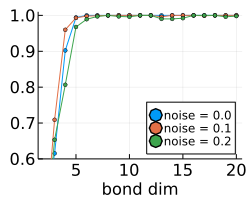

In [12]:
plot()

for (i, noise) in enumerate(noise_arr)

    
    plot!(bond_dim_arr, last_train_acc[i,:], xtickfontsize = 11, ytickfontsize = 11, 
                legend = :bottomright, 
                label = "noise = $(noise)", marker = :o, markersize = 2,
                left_margin = 0Plots.mm, right_margin = 0Plots.mm, 
                bottom_margin = 3Plots.mm, )#, linestyle = :dash) 
end

# vline!([6], color = "black", linestyle = :dash, label = "")

# plot!([17, 32], [0,0], fillrange = [1,1], fillalpha = 0.1, color = "black", label = "")
# plot!([19, 32], [0,0], fillrange = [1,1], fillalpha = 0.1, color = "black", label = "")
# plot!([25, 32], [0,0], fillrange = [1,1], fillalpha = 0.1, color = "black", label = "")

ylims!(0.6, 1.01)
plot!(size=(250, 220), xlabel = "bond dim", #xticks = bond_dim_arr, 
        ylabel ="", )
#         xticks = [i for i in 2:4:30], yticks = [0.9 + i/100 for i in 0:2:10])

In [13]:
savefig("train_acc.pdf")